<a href="https://colab.research.google.com/github/thiagoramos20042/analiseexploratoria-da-maratona-de-Boston-2019/blob/main/Data%20analytics%20na%20%C3%A1rea%20da%20sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

plt.style.use('ggplot')

In [248]:
dataset = pd.read_csv('/content/cardio_train.csv',sep=';')
#link do dataset
#https://www.kaggle.com/sulianova/cardiovascular-disease-dataset

In [249]:
#Exibindo as 5 primeiras linhas
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [250]:
#Renomeando as colunas
dataset.columns = ['id', 'Idade','Gênero', 'Altura', 'Peso', 'Pressão sistólica', 'Pressão diastólica', 'Colesterol', 'Glicemia', 'Fumante','Alcool', 'Atividade', 'Cardiaco']

In [251]:
#Analisando a alteração das colunas com os 'Novos nomes'
dataset.head()

,id,Idade,Gênero,Altura,Peso,Pressão sistólica,Pressão diastólica,Colesterol,Glicemia,Fumante,Alcool,Atividade,Cardiaco
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [252]:
#Removendo colunas
dataset.drop('id',axis=1, inplace=True)
dataset.drop('Colesterol',axis=1, inplace=True)
dataset.drop('Glicemia',axis=1, inplace=True)
dataset.drop('Fumante',axis=1, inplace=True)
dataset.drop('Alcool',axis=1, inplace=True)
dataset.drop('Cardiaco',axis=1, inplace=True)
dataset.drop('Pressão sistólica',axis=1, inplace=True)
dataset.drop('Pressão diastólica',axis=1, inplace=True)



In [253]:
dataset.head()

,Idade,Gênero,Altura,Peso,Atividade
0,18393,2,168,62.0,1
1,20228,1,156,85.0,1
2,18857,1,165,64.0,0
3,17623,2,169,82.0,1
4,17474,1,156,56.0,0


In [254]:
#Quantidade de pessoas dividido por gênero
dataset[u'Gênero'].value_counts()
# 1 = mulher
# 2 = homem

1    45530
2    24470
Name: Gênero, dtype: int64

In [255]:
# Qual é a média de idade entre os gêneros
dataset[u'Idade'].mean()/365
# Idade está em dias por isso dividi por 365 para achar a idade em anos


53.33935839530332

In [257]:
#Qual a média do peso entre os gêneros
dataset[u'Peso'].mean()


74.20569

In [258]:
#Qual a média da altura entre os gêneros
dataset[u'Altura'].mean()


164.35922857142856

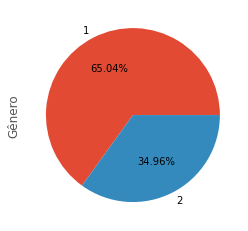

In [260]:
#Divisão percentual da Amostra
dataset.Gênero.value_counts().plot(kind='pie', autopct='%.2f%%')            


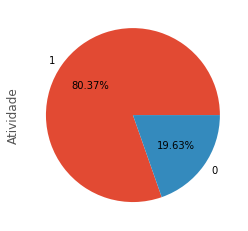

In [259]:
#Gráfico com valor percentual por gênero que fazem atividade física
dataset.Atividade.value_counts().plot(kind='pie', autopct='%.2f%%')            



In [242]:
#Mulheres que fazem atividade física
dataset.loc[(dataset["Gênero"]==1)& (dataset["Atividade"]==1)].count()


Idade        36516
Gênero       36516
Altura       36516
Peso         36516
Atividade    36516
dtype: int64

In [243]:
#Mulheres que não fazem atividade física

dataset.loc[(dataset["Gênero"]==1)& (dataset["Atividade"]==0)].count()


Idade        9014
Gênero       9014
Altura       9014
Peso         9014
Atividade    9014
dtype: int64

In [244]:
#comparação entre as mulheres que fazem atividade física
trace = go.Bar(x = ['Fazem atividade física', 'Não Fazem atividade física'],
               y= [36516,9014])
dataset=[trace]
py.iplot(dataset)